# Skin Cancer Prediction

# Content

# 1. Importing all necessary libraries

In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.layers import Dropout
import matplotlib.pyplot as plt
import numpy as np
import os
from tqdm import tqdm
import cv2
from glob import glob
import seaborn as sns
sns.set()

import sklearn
import skimage
from skimage.transform import resize

import random
from skimage.color import rgb2gray
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


# 2. Loading and Preprocessing the data

In [2]:
train = "C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/train"

test = "C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/test"



LOAD_FROM_IMAGES = True

def get_data(folder):
    x = []
    y = []
    for folderName in os.listdir(folder):
        if not folderName.startswith("."):
            if folderName in ["benign"]:
                label = 0
            elif folderName in ["malignant"]:
                label = 1
            else:
                label = 2
            for image_filename in tqdm(os.listdir(folder +"/" +folderName+"/")):
                img_file = cv2.imread(folder + "/" +folderName + "/" + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file,(224,224,3), mode = "constant",anti_aliasing=True)
                    #img_file = rgb2gray(img_file)
                    img_arr = np.asarray(img_file)
                    x.append(img_arr)
                    y.append(label)
    x = np.asarray(x)
    y = np.asarray(y)
    return x,y

if LOAD_FROM_IMAGES:
    X_train,y_train = get_data(train)
    X_test, y_test = get_data(test)
    
    np.save("xtrain.npy",X_train)
    np.save("ytrain.npy",y_train)
    np.save("xtest.npy",X_test)
    np.save("ytest.npy",y_test)
else:
    X_train = np.load("xtrain.npy")
    y_train = np.load("ytrain.npy")
    X_test = np.load("xtest.npy")
    y_test = np.load("ytest.npy")

100%|██████████| 300/300 [00:05<00:00, 55.37it/s]


In [3]:
X_train=X_train.astype('float32')
y_train
X_test=X_test.astype('float32')
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 3. Data Visualization

# 1. Plotting two images from X_train

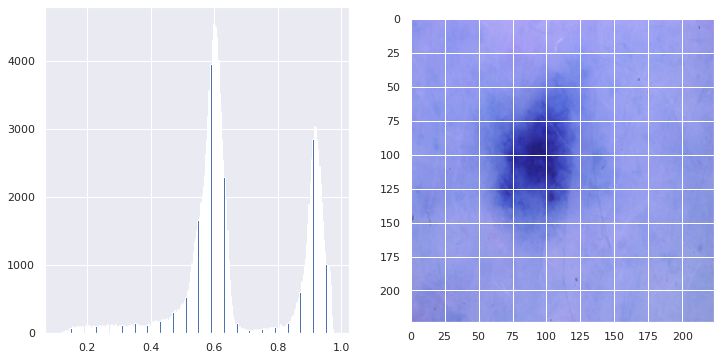

In [4]:
def plot_histogram(a):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.hist(a.ravel(),bins=255)
    plt.subplot(1,2,2)
    plt.imshow(a,vmin=0,vmax=1)
    plt.show()
    
    
plot_histogram(X_train[2])

## 2. Benign Images of Training data

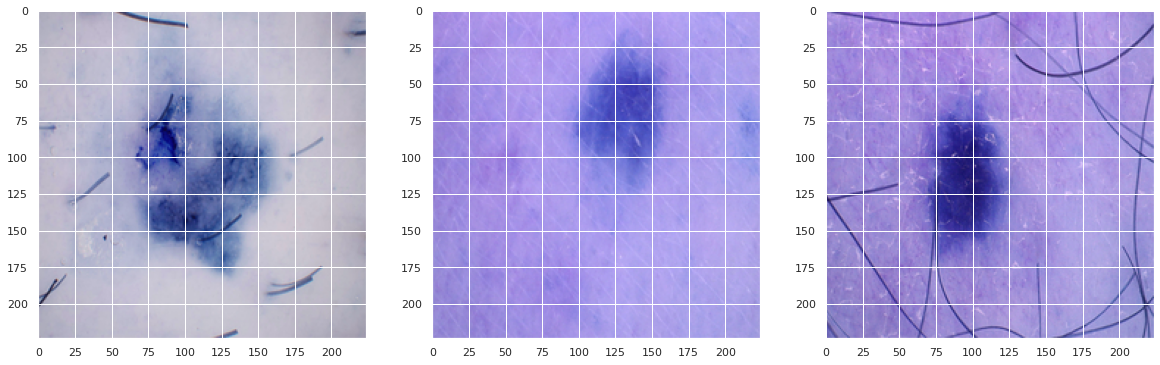

In [5]:
glob_img = glob("C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/train/benign")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)
    

## 3. Malignant Images of Training data

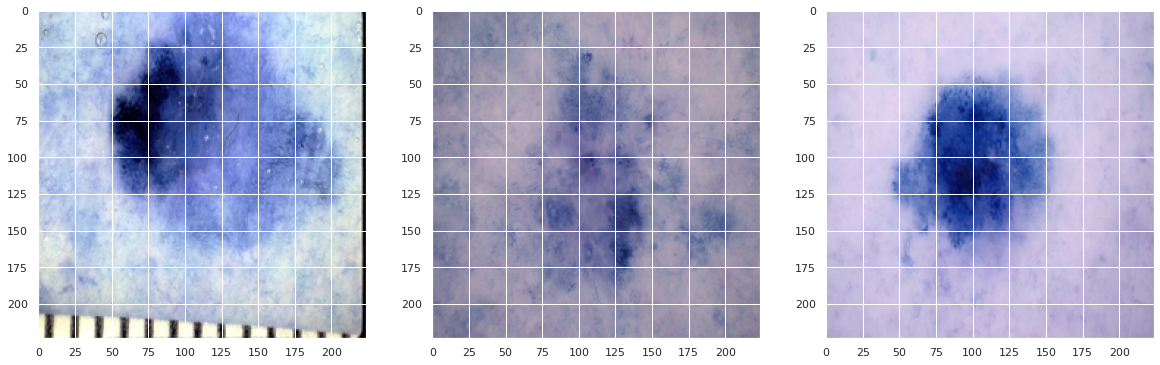

In [6]:
glob_img = glob("C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/train/malignant")

def plot(images):
    z = random.sample(images,3)
    plt.figure(figsize=(20,20))
    plt.subplot(131)
    plt.imshow(cv2.imread(z[0]))
    plt.subplot(132)
    plt.imshow(cv2.imread(z[1]))
    plt.subplot(133)
    plt.imshow(cv2.imread(z[2]))

plot(glob_img)

## 4. Benign

Benign


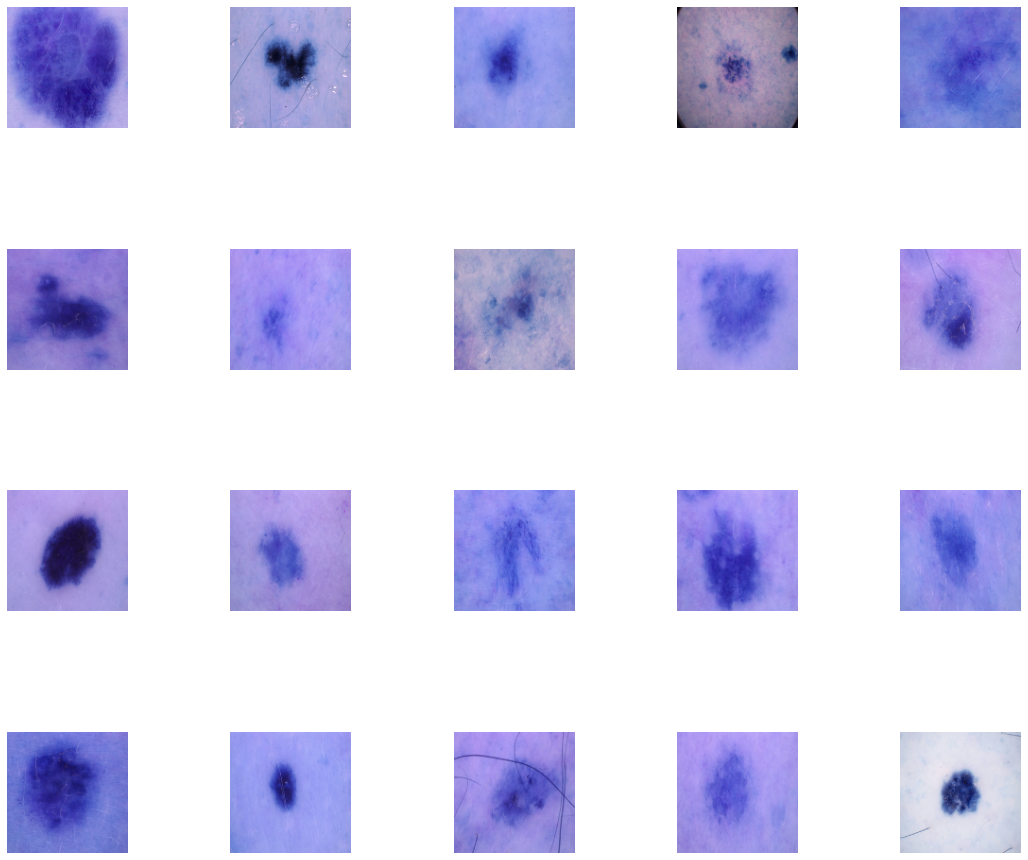

In [7]:
print("Benign")

glob_img = glob("C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/train/benign")
i_=0
plt.rcParams["figure.figsize"] =(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=1)
for i in  glob_img[0:20]:
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(img);plt.axis("off")
    i_ +=1

## 5. Malignant

Malignant


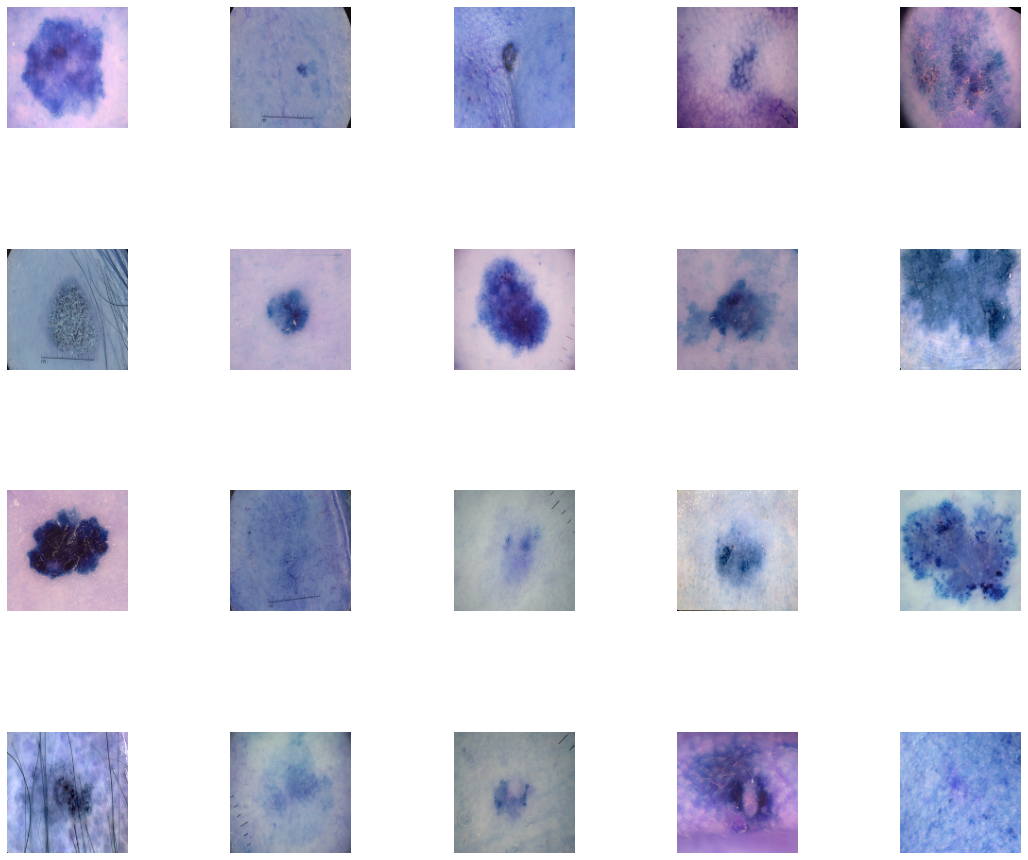

In [8]:
print("Malignant")

glob_img = glob("C:/Users/neha srivastav/Downloads/Skin Cancer Prediction/train/malignant")
i_=0
plt.rcParams["figure.figsize"] =(20.0,20.0)
plt.subplots_adjust(wspace=0,hspace=1)
for i in  glob_img[0:20]:
    img=cv2.imread(i)
    img=cv2.resize(img,(128,128))
    plt.subplot(5,5,i_+1)
    plt.imshow(img);plt.axis("off")
    i_ +=1

# 6. Countplot of Dependent Variable

{0: 'benign', 1: 'malignant'}


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


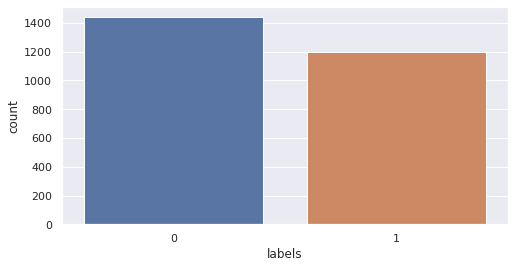

In [9]:
plt.figure(figsize=(8,4))

map_characters = {0:"benign",1:"malignant"}
dict_characters = map_characters

df = pd.DataFrame()
df["labels"]=y_train
lab = df["labels"]
dist=lab.value_counts()
sns.countplot(lab)
print(dict_characters)

## 4. Data Generator

In [10]:
generatordata = ImageDataGenerator(zoom_range = 0.2,height_shift_range = 0.1,
                                   width_shift_range = 0.2,rotation_range = 12)

# 5. Data Normalization

In [11]:
X_train = X_train/255
X_test = X_test/255

X_train_R= X_train.reshape(len(X_train),224,224,3)
X_test_R= X_test.reshape(len(X_test),224,224,3)
y_train = np_utils.to_categorical(y_train, num_classes= 2)
y_test = np_utils.to_categorical(y_test, num_classes= 2)

# 6. Model Building

# 6.1 CNN

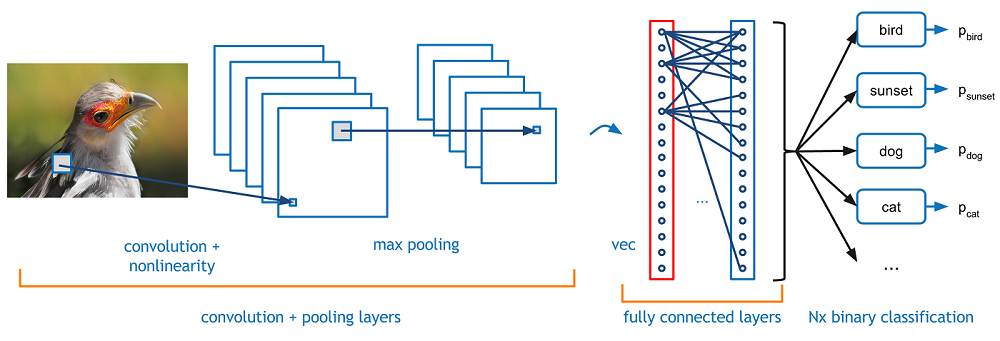

1. <b>Convolutional Layer</b>: Filters/Feature maps that are used to transform the images. This is called the Convolutional Layer.
2. <b>Pooling Layer</b>: Max Pooling is useful for downsampling. It reduces computational costs and also to some extent overfitting.
3. <b>Dropout</b>: Regularization method to randomly drop some nodes while training (i.e. setting their weights to 0). This forces the network to learn features in a distributed ways. Thus, prevents overfitting and improves generalization.
4. <b>Flatten</b>: Flatten layer is used to convert feature maps to 1D vector so that they can be used for prediction.
5. <b>Dense layer with Relu</b>: Dense Layer refers to simple ANN with non-linear Relu activation function.
6. <b>Dense layer with Softmax</b>: ANN layer with binary activation function Softmax for final classification.

In [12]:
model = models.Sequential()

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",
                        kernel_initializer="glorot_uniform",input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",
                        kernel_initializer="glorot_uniform"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu",
                        kernel_initializer="glorot_uniform"))

model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(128,activation="relu",kernel_initializer="normal"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(layers.Dense(2,activation="softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 64)      256       
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        3

In [14]:
model.compile(optimizer = "adam" , loss = "binary_crossentropy", metrics=["accuracy"])

In [15]:
batch_size=32
epochs=100

In [16]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)


In [17]:
from tensorflow.keras.callbacks import EarlyStopping

custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=95,
    restore_best_weights=True
)

In [18]:
history =  model.fit(generatordata.flow(X_train_R, y_train, batch_size=batch_size),epochs=epochs,
                              verbose=1,
                              validation_data =(X_test_R,y_test),callbacks=[learning_rate_reduction,custom_early_stopping])

Epoch 1/100
83/83 [==============================] - 31s 324ms/step - loss: 0.6058 - accuracy: 0.7193 - val_loss: 1.3152 - val_accuracy: 0.4545
Epoch 2/100
83/83 [==============================] - 26s 314ms/step - loss: 0.4806 - accuracy: 0.7744 - val_loss: 1.1669 - val_accuracy: 0.4545
Epoch 3/100
83/83 [==============================] - 27s 327ms/step - loss: 0.4431 - accuracy: 0.7979 - val_loss: 1.0905 - val_accuracy: 0.4545
Epoch 4/100
83/83 [==============================] - 27s 327ms/step - loss: 0.4530 - accuracy: 0.7838 - val_loss: 0.7025 - val_accuracy: 0.4545
Epoch 5/100
83/83 [==============================] - 27s 326ms/step - loss: 0.4436 - accuracy: 0.7773 - val_loss: 1.0622 - val_accuracy: 0.4545
Epoch 6/100
83/83 [==============================] - 27s 325ms/step - loss: 0.4134 - accuracy: 0.8062 - val_loss: 0.4903 - val_accuracy: 0.8076
Epoch 7/100
83/83 [==============================] - 27s 328ms/step - loss: 0.4204 - accuracy: 0.8002 - val_loss: 0.4766 - val_accuracy:

In [19]:
score = model.evaluate(X_test_R, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 0s 15ms/step - loss: 0.3172 - accuracy: 0.8348
Test loss: 0.31718334555625916
Test accuracy: 0.8348484635353088


# 6.2 ResNet V2

In [23]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

input_shape = (224,224,3)
epochs = 100
batch_size = 16

model = ResNet50V2(include_top=True,
                 weights= None,
                 input_tensor=None,
                 input_shape=input_shape,
                 pooling='max ',
                 classes=2)

model.compile(optimizer = "adam" ,
              loss = "binary_crossentropy", 
              metrics=["accuracy"])


history = model.fit(X_train_R, y_train, validation_split=0.2,
                    epochs= epochs, batch_size= batch_size, verbose=1,
                    callbacks=[learning_rate_reduction,custom_early_stopping] )

Epoch 1/100
132/132 [==============================] - 19s 109ms/step - loss: 0.6589 - accuracy: 0.6935 - val_loss: 3.8474 - val_accuracy: 0.0000e+00
Epoch 2/100
132/132 [==============================] - 13s 98ms/step - loss: 0.4401 - accuracy: 0.7751 - val_loss: 2.4612 - val_accuracy: 0.0000e+00
Epoch 3/100
132/132 [==============================] - 13s 97ms/step - loss: 0.4306 - accuracy: 0.7718 - val_loss: 3.1275 - val_accuracy: 0.0000e+00
Epoch 4/100
132/132 [==============================] - 13s 98ms/step - loss: 0.4126 - accuracy: 0.8114 - val_loss: 2.3386 - val_accuracy: 0.0000e+00
Epoch 5/100
132/132 [==============================] - 13s 98ms/step - loss: 0.4282 - accuracy: 0.7949 - val_loss: 4.7956 - val_accuracy: 0.0000e+00
Epoch 6/100
132/132 [==============================] - 13s 97ms/step - loss: 0.3733 - accuracy: 0.8134 - val_loss: 4.4083 - val_accuracy: 0.0000e+00
Epoch 7/100
132/132 [==============================] - 13s 97ms/step - loss: 0.3872 - accuracy: 0.8055 - 

In [24]:
score = model.evaluate(X_test_R, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

42/42 [==============================] - 2s 36ms/step - loss: 1.5551 - accuracy: 0.7273
Test loss: 1.555081844329834
Test accuracy: 0.7272727489471436


# 6.3 VGG16

In [28]:
from tensorflow.keras.applications import vgg16
def create_vgg16():  
  model = vgg16.VGG16(include_top=True, weights=None, input_tensor=None, 
                      input_shape=(224,224,3), 
                      pooling="max", classes=2)

  return model

vgg16_model = create_vgg16()  
vgg16_model.compile(loss='binary_crossentropy', optimizer='adam',
                    metrics=['acc'])  


vgg16 = vgg16_model.fit(x=X_train_R,
                        y=y_train, batch_size=32,
                        epochs=100, verbose=1,
                        validation_data=(X_test_R, y_test), 
                        shuffle=True,
                        callbacks=[learning_rate_reduction,
                                                custom_early_stopping])  

Epoch 1/100
83/83 [==============================] - 23s 254ms/step - loss: 0.6939 - acc: 0.5238 - val_loss: 0.6894 - val_acc: 0.5455
Epoch 2/100
83/83 [==============================] - 19s 231ms/step - loss: 0.6933 - acc: 0.5327 - val_loss: 0.6896 - val_acc: 0.5455
Epoch 3/100
83/83 [==============================] - 19s 233ms/step - loss: 0.6870 - acc: 0.5666 - val_loss: 0.6895 - val_acc: 0.5455
Epoch 4/100
83/83 [==============================] - 19s 232ms/step - loss: 0.6890 - acc: 0.5509 - val_loss: 0.6891 - val_acc: 0.5455
Epoch 5/100
83/83 [==============================] - 19s 231ms/step - loss: 0.6863 - acc: 0.5643 - val_loss: 0.6894 - val_acc: 0.5455
Epoch 6/100
83/83 [==============================] - 19s 232ms/step - loss: 0.6901 - acc: 0.5408 - val_loss: 0.6890 - val_acc: 0.5455

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/100
83/83 [==============================] - 19s 233ms/step - loss: 0.6898 - acc: 0.5420 - val_loss: 0.6890

In [29]:
score = vgg16_model.evaluate(X_test_R, y_test, batch_size=batch_size, verbose=1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

42/42 [==============================] - 2s 41ms/step - loss: 0.6890 - acc: 0.5455
Test loss: 0.6890094876289368
Test accuracy: 0.5454545617103577


# 7. Conclusion

In [3]:
models = pd.DataFrame({"Model":['CNN','ResNet','VGG16'],
           "Accuracy":[83.48,72.72, 54.54]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,CNN,83.48
1,ResNet,72.72
2,VGG16,54.54


<AxesSubplot:xlabel='Accuracy', ylabel='Model'>

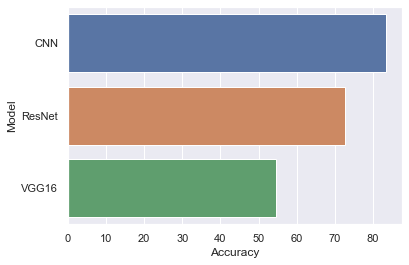

In [4]:
sns.barplot(x= 'Accuracy', y= 'Model', data= models)